# Wine Quality Prediction

Multiple Logistic Regression

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading Data
import pandas as pd

wine = pd.read_csv('/content/sample_data/winequality-red.csv')
wine_test = pd.read_csv('/content/sample_data/winequality-red_test.csv')

In [ ]:
!pip install autograd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from autograd import grad

In [ ]:
display(wine.head())
display(wine_test.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.3,0.670,0.02,2.20,0.072,31,92,0.99566,3.32,0.68,11.066667
1,7.2,0.370,0.32,2.00,0.062,15,28,0.99470,3.23,0.73,11.300000
2,7.4,0.785,0.19,5.20,0.094,19,98,0.99713,3.16,0.52,9.566667
3,6.9,0.630,0.02,1.90,0.078,18,30,0.99712,3.40,0.75,9.800000
4,6.9,0.580,0.20,1.75,0.058,8,22,0.99322,3.38,0.49,11.700000


In [ ]:
#Information about the data columns

display(wine.info())
display(wine_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1439 non-null   float64
 1   volatile acidity      1439 non-null   float64
 2   citric acid           1439 non-null   float64
 3   residual sugar        1439 non-null   float64
 4   chlorides             1439 non-null   float64
 5   free sulfur dioxide   1439 non-null   float64
 6   total sulfur dioxide  1439 non-null   float64
 7   density               1439 non-null   float64
 8   pH                    1439 non-null   float64
 9   sulphates             1439 non-null   float64
 10  alcohol               1439 non-null   float64
 11  quality               1439 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 135.0 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         160 non-null    float64
 1   volatile acidity      160 non-null    float64
 2   citric acid           160 non-null    float64
 3   residual sugar        160 non-null    float64
 4   chlorides             160 non-null    float64
 5   free sulfur dioxide   160 non-null    int64  
 6   total sulfur dioxide  160 non-null    int64  
 7   density               160 non-null    float64
 8   pH                    160 non-null    float64
 9   sulphates             160 non-null    float64
 10  alcohol               160 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 13.9 KB


None

##  Data exploration

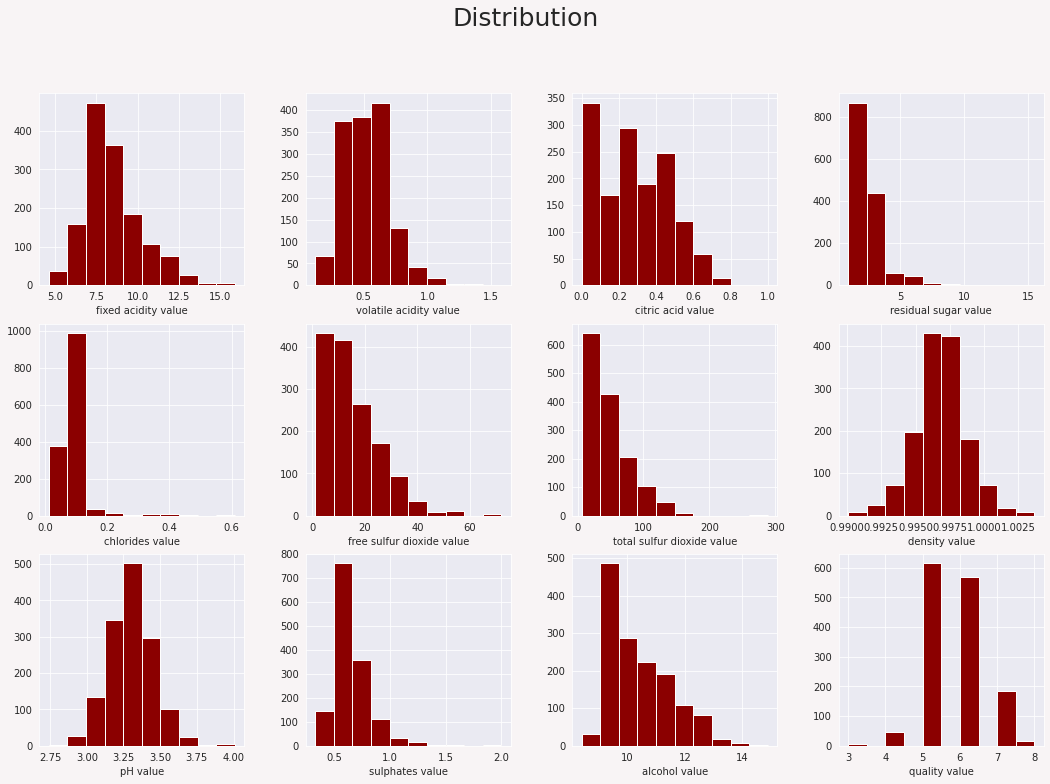

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig , axes = plt.subplots(3,4, figsize=(18, 12), facecolor='#f8f4f5')
plt.subplots_adjust(wspace = 0.3, hspace = 0.2)
fig.suptitle('Distribution', fontsize = 25)
sns.set_style("darkgrid")

# loop through columns
for i,j in enumerate(wine.columns):
      
    axes[i//4][i%4].set_xlabel(j + " value")
    axes[i//4][i%4].hist(wine[j] , color='darkred')

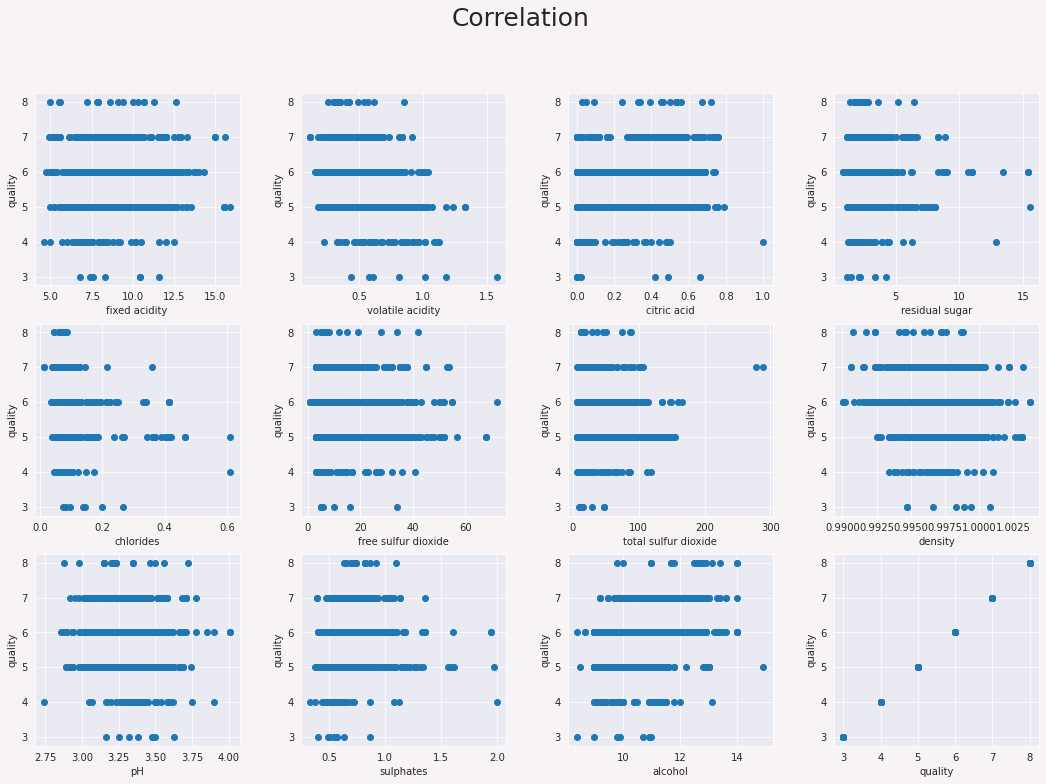

In [ ]:
fig , axes = plt.subplots(3, 4, figsize=(18,12), facecolor='#f8f4f5')
plt.subplots_adjust(wspace = 0.3, hspace = 0.2)
fig.suptitle('Correlation', fontsize = 25)
sns.set_style("darkgrid")

features = wine.columns[:].values
n = 0
for i,j in enumerate(wine[features].columns):
  axes[n//4][n%4].set_xlabel(j)
  axes[n//4][n%4].set_ylabel('quality')
  axes[n//4][n%4].scatter(x=wine[j], y=wine['quality'])
  n += 1

correlation을 통해 상관관계를 분석하기 어려움

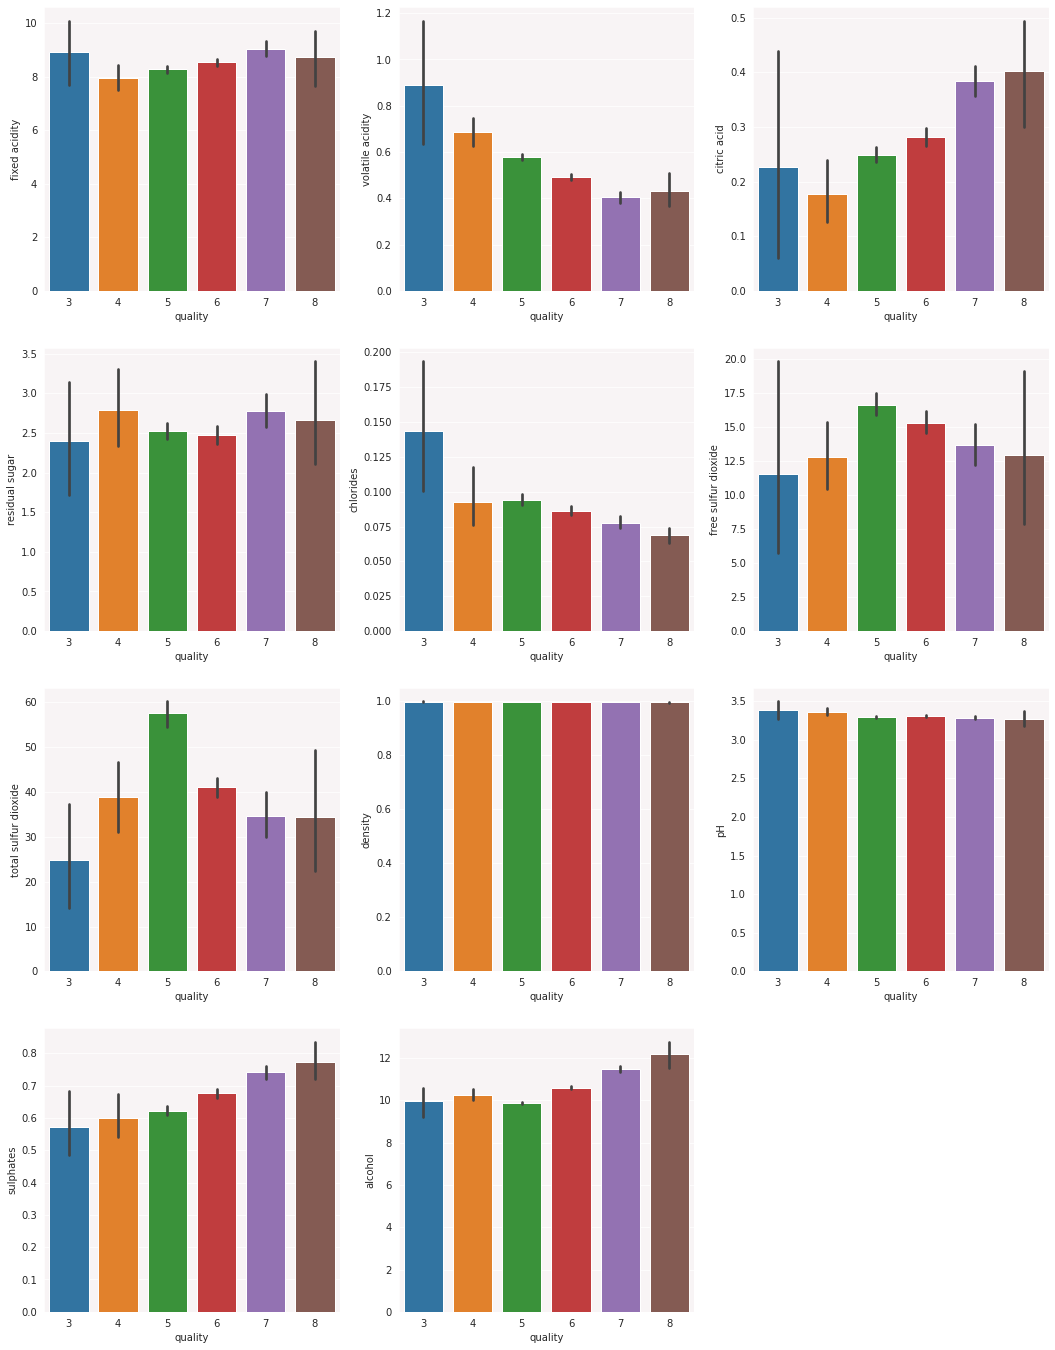

In [ ]:
sns.set_style("darkgrid")
fig = plt.figure(figsize = (18,24))
cols = [col for col in wine.columns[:-1]]
cnt = 1
for col in cols :
    plt.subplot(4, 3, cnt, facecolor='#f8f4f5')
    sns.barplot(data = wine, x = 'quality', y = col)
    cnt+=1
plt.show()  

In [ ]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

**volatile acidity, chlorides, pH** 에서 qulity와 반비례 관계가 나타남

**citric acid, sulphates, alcohol** 에서 quality와 비례 관계가 나타남

**'free sulfur dioxide', 'total sulfur dioxide' + additional**


## Pre-processing

In [ ]:
bins = (0, 5, 10)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [ ]:
#Bad becomes 0 and good becomes 1 
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [ ]:
wine['quality'].value_counts()

1    769
0    670
Name: quality, dtype: int64

### Nomalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

tmp = wine.drop('quality', axis = 1)
y_n = wine['quality']
scaler = MinMaxScaler()
wine_n = scaler.fit_transform(tmp)
wine_test_n = scaler.fit_transform(wine_test)

In [ ]:
#Now seperate the dataset as response variable and feature variabes
X = wine.drop('quality', axis = 1)
y = wine['quality']

### Train & Test set split

In [ ]:
# splitting the dataset
# train : val= 9 : 1

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state = 42, shuffle=False)

In [ ]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1290,7.6,0.740,0.00,1.9,0.100,6.0,12.0,0.99521,3.36,0.59,11.0
1291,8.2,0.635,0.10,2.1,0.073,25.0,60.0,0.99638,3.29,0.75,10.9
1292,5.9,0.395,0.13,2.4,0.056,14.0,28.0,0.99362,3.62,0.67,12.4
1293,7.5,0.755,0.00,1.9,0.084,6.0,12.0,0.99672,3.34,0.49,9.7


In [ ]:
X_val

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1295,6.6,0.630,0.00,4.3,0.093,51.0,77.5,0.99558,3.20,0.45,9.5
1296,6.6,0.630,0.00,4.3,0.093,51.0,77.5,0.99558,3.20,0.45,9.5
1297,7.2,0.530,0.14,2.1,0.064,15.0,29.0,0.99323,3.35,0.61,12.1
1298,5.7,0.600,0.00,1.4,0.063,11.0,18.0,0.99191,3.45,0.56,12.2
1299,7.6,1.580,0.00,2.1,0.137,5.0,9.0,0.99476,3.50,0.40,10.9
...,...,...,...,...,...,...,...,...,...,...,...
1434,10.2,0.540,0.37,15.4,0.214,55.0,95.0,1.00369,3.18,0.77,9.0
1435,10.2,0.540,0.37,15.4,0.214,55.0,95.0,1.00369,3.18,0.77,9.0
1436,10.0,0.380,0.38,1.6,0.169,27.0,90.0,0.99914,3.15,0.65,8.5
1437,6.8,0.915,0.29,4.8,0.070,15.0,39.0,0.99577,3.53,0.54,11.1


In [ ]:
wine_n

array([[0.24778761, 0.39726027, 0.        , ..., 0.60629921, 0.13772455,
        0.15384615],
       [0.28318584, 0.52054795, 0.        , ..., 0.36220472, 0.20958084,
        0.21538462],
       [0.28318584, 0.43835616, 0.04      , ..., 0.40944882, 0.19161677,
        0.21538462],
       ...,
       [0.47787611, 0.17808219, 0.38      , ..., 0.32283465, 0.19161677,
        0.01538462],
       [0.19469027, 0.54452055, 0.29      , ..., 0.62204724, 0.1257485 ,
        0.41538462],
       [0.21238938, 0.32191781, 0.        , ..., 0.52755906, 0.08383234,
        0.29230769]])

In [ ]:
wine_n = pd.DataFrame(wine_n)
test_n = pd.DataFrame(wine_test_n)

In [ ]:
X_tn, X_vn, y_tn, y_vn = train_test_split(wine_n, y_n, test_size = 0.1, random_state = 42, shuffle=False)

## Original data vs Normalized Data

In [ ]:
import sympy
import autograd.numpy as np

In [ ]:
y_train.astype('float')

0       0.0
1       0.0
2       0.0
3       1.0
4       0.0
       ... 
1290    0.0
1291    1.0
1292    1.0
1293    0.0
1294    1.0
Name: quality, Length: 1295, dtype: float64

In [ ]:
def logistic(x):
  out = 1. / (1. + np.exp(-x))
  return out

def logistic_model(x, params):
  out = logistic(np.dot(x, params[0]) + params[1])
  return out

In [ ]:
def model_loss(x, true_labels, params, _lambda=1.0):
  pred = logistic_model(x, params)
    
  loss = - (
    np.dot(true_labels, np.log(pred+1e-15)) +
    np.dot(1.-true_labels, np.log(1.-pred+1e-15))
  ) + _lambda * np.sum(params[0]**2)
    
  return loss

In [ ]:
def classify(x, params):
  probabilities = logistic_model(x, params)
  labels = (probabilities >= 0.5).astype(float)
  return labels

In [ ]:
def performance(predictions, answers, beta=1.0):
  true_idx = (answers == 1)  # the location where the answers are 1
  false_idx = (answers == 0)  # the location where the answers are 0
    
  # true positive: answers are 1 and predictions are also 1
  n_tp = np.count_nonzero(predictions[true_idx] == 1)
  
  # false positive: answers are 0 but predictions are 1
  n_fp = np.count_nonzero(predictions[false_idx] == 1)
    
  # true negative: answers are 0 and predictions are also 0
  n_tn = np.count_nonzero(predictions[false_idx] == 0)
    
  # false negative: answers are 1 but predictions are 0
  n_fn = np.count_nonzero(predictions[true_idx] == 0)
    
  # precision, recall, and f-score
  precision = n_tp / (n_tp + n_fp)
  recall = n_tp / (n_tp + n_fn)
  score = (
      (1.0 + beta**2) * precision * recall / 
      (beta**2 * precision + recall)
  )

  accuracy = (n_tp + n_tn) / (n_tp + n_fn + n_fp + n_tn)

  return precision, recall, score, accuracy

### Original data

In [ ]:
gradients = grad(model_loss, argnum=2)

In [ ]:
lr = 1e-5
change = np.inf
i = 0
old_val_loss = 1e-15

w = np.zeros(X_train.shape[1], dtype=float)
b = 0.99

while change >= 1e-5 and i < 10000:   
  # calculate gradients and use gradient descents
  grads = gradients(X_train.to_numpy(), y_train.astype('float'), (w, b))
  w -= (grads[0] * lr)
  b -= (grads[1] * lr)
    
  # validation loss
  val_loss = model_loss(X_val, y_val, (w, b))
    
  try:
    pred_labels_val = classify(X_vn.to_numpy(), (w, b))
    score = performance(pred_labels_val, y_vn.astype('float'))
    change = np.abs((val_loss - old_val_loss)/old_val_loss)
  except ZeroDivisionError as e:
    print("division by zero")

  # update the counter and old_val_loss
  i += 1
  old_val_loss = val_loss
    
  # print the progress every 10 steps
  if i % 10 == 0:
    print("{}...".format(i), end="")

print("")
print("")
print("Upon optimization stopped:")
print("    Iterations:", i)
print("    Validation loss:", val_loss)
print("    Validation precision:", score[0])
print("    Validation recall:", score[1])
print("    Validation F-score:", score[2])
print("    Validation Accuracy:", score[3])
print("    Change in validation loss:", change)

In [ ]:
# final accuracy
pred_labels_test = classify(X_val, (w, b))
perf = performance(pred_labels_test, y_val)

print("Final precision: {:.1f}%".format(perf[0]*100))
print("Final recall: {:.1f}%".format(perf[1]*100))
print("Final F-score: {:.1f}%".format(perf[2]*100))
print("Final Accuracy: {:.1f}%".format(perf[3]*100))

Final precision: 47.1%
Final recall: 98.5%
Final F-score: 63.7%
Final Accuracy: 48.6%


### Nomalized Data

In [ ]:
lr = 1e-5
change = np.inf
i = 0
old_val_loss = 1e-15

w = np.zeros(X_train.shape[1], dtype=float)
b = 0.99

while change >= 1e-5 and i < 10000:
  grads = gradients(X_tn.to_numpy(), y_tn.astype('float'), (w, b))
  w -= (grads[0] * lr)
  b -= (grads[1] * lr)
    
  val_loss = model_loss(X_vn, y_vn, (w, b))
    
  try:
    pred_labels_val = classify(X_vn.to_numpy(), (w, b))
    score = performance(pred_labels_val, y_vn.astype('float'))
    change = np.abs((val_loss - old_val_loss)/old_val_loss)
  except ZeroDivisionError as e:
    print("division by zero")

  i += 1
  old_val_loss = val_loss
    
  if i % 10 == 0:
    print("{}...".format(i), end="")

print("")
print("")
print("Upon optimization stopped:")
print("    Iterations:", i)
print("    Validation loss:", val_loss)
print("    Validation precision:", score[0])
print("    Validation recall:", score[1])
print("    Validation F-score:", score[2])
print("    Validation Accuracy:", score[3])
print("    Change in validation loss:", change)

In [ ]:
# final accuracy
pred_labels_test_n = classify(X_vn, (w, b))
perf_n = performance(pred_labels_test_n, y_vn)

print("Final precision: {:.1f}%".format(perf_n[0]*100))
print("Final recall: {:.1f}%".format(perf_n[1]*100))
print("Final F-score: {:.1f}%".format(perf_n[2]*100))
print("Final Accuracy: {:.1f}%".format(perf_n[3]*100))

Final precision: 60.4%
Final recall: 87.9%
Final F-score: 71.6%
Final Accuracy: 68.1%


**Nomalization을 통해 성능 향상을 기대할 수 있다.**

##  Feature selection

Data exploration에서 

volatile acidity, chlorides, pH 에서 qulity와 반비례 관계가 나타남

citric acid, sulphates, alcohol 에서 quality와 비례 관계가 나타남

In [ ]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
features = ['volatile acidity', 'chlorides', 'pH', 'citric acid', 'sulphates', 'alcohol']

In [ ]:
wine_fs = wine[features]
test_fs = wine_test[features]

In [ ]:
wine_fs = scaler.fit_transform(wine_fs)
test_fs = scaler.fit_transform(test_fs)

In [ ]:
X_tfs, X_vfs, y_tfs, y_vfs = train_test_split(wine_fs, y_n, test_size = 0.1, random_state = 42, shuffle=False)

In [ ]:
print(X_tfs.shape, X_vfs.shape, y_tfs.shape, y_vfs.shape)

(1295, 6) (144, 6) (1295,) (144,)


In [ ]:
lr = 1e-5
change = np.inf
i = 0
old_val_loss = 1e-15

w = np.zeros(X_tfs.shape[1], dtype=float)
b = 0.99

while change >= 1e-5 and i < 10000:
  grads = gradients(X_tfs, y_tfs.astype('float'), (w, b))
  w -= (grads[0] * lr)
  b -= (grads[1] * lr)
    
  val_loss = model_loss(X_vfs, y_vfs, (w, b))

  try:
    pred_labels_val = classify(X_vfs, (w, b))
    score = performance(pred_labels_val, y_vfs.astype('float'))
    change = np.abs((val_loss - old_val_loss)/old_val_loss)
  except ZeroDivisionError as e:
    print("division by zero")

  i += 1
  old_val_loss = val_loss
    
  if i % 10 == 0:
    print("{}...".format(i), end="")

print("")
print("")
print("Upon optimization stopped:")
print("    Iterations:", i)
print("    Validation loss:", val_loss)
print("    Validation precision:", score[0])
print("    Validation recall:", score[1])
print("    Validation F-score:", score[2])
print("    Validation Accuracy:", score[3])
print("    Change in validation loss:", change)

In [ ]:
# final accuracy
pred_labels_test_fs = classify(X_vfs, (w, b))
perf_fs = performance(pred_labels_test_fs, y_vfs)

print("Final precision: {:.1f}%".format(perf_fs[0]*100))
print("Final recall: {:.1f}%".format(perf_fs[1]*100))
print("Final F-score: {:.1f}%".format(perf_fs[2]*100))
print("Final Accuracy: {:.1f}%".format(perf_fs[3]*100))

Final precision: 61.6%
Final recall: 92.4%
Final F-score: 73.9%
Final Accuracy: 70.1%


**Feature Selection을 통해 성능 향상을 기대할 수 있다**

## Feature Selection 2


In [ ]:
features2 = ['volatile acidity', 'chlorides', 'pH', 'citric acid', 'sulphates', 'alcohol', 'total sulfur dioxide']

In [ ]:
wine_fs2 = wine[features2]
test_fs2 = wine_test[features2]

In [ ]:
wine_fs2 = scaler.fit_transform(wine_fs2)
test_fs2 = scaler.fit_transform(test_fs2)

In [ ]:
X_tfs2, X_vfs2, y_tfs2, y_vfs2 = train_test_split(wine_fs2, y_n, test_size = 0.1, random_state = 42, shuffle=False)

In [ ]:
lr = 1e-5
change = np.inf
i = 0
old_val_loss = 1e-15

w = np.zeros(X_tfs2.shape[1], dtype=float)
b = 0.99

while change >= 1e-5 and i < 10000:
  grads = gradients(X_tfs2, y_tfs2.astype('float'), (w, b))
  w -= (grads[0] * lr)
  b -= (grads[1] * lr)
    
  val_loss = model_loss(X_vfs2, y_vfs2, (w, b))

  try:
    pred_labels_val = classify(X_vfs2, (w, b))
    score = performance(pred_labels_val, y_vfs2.astype('float'))
    change = np.abs((val_loss - old_val_loss)/old_val_loss)
  except ZeroDivisionError as e:
    print("division by zero")

  i += 1
  old_val_loss = val_loss
    
  if i % 10 == 0:
    print("{}...".format(i), end="")

print("")
print("")
print("Upon optimization stopped:")
print("    Iterations:", i)
print("    Validation loss:", val_loss)
print("    Validation precision:", score[0])
print("    Validation recall:", score[1])
print("    Validation F-score:", score[2])
print("    Validation Accuracy:", score[3])
print("    Change in validation loss:", change)

In [ ]:
# final accuracy
pred_labels_test_fs2 = classify(X_vfs2, (w, b))
perf_fs2 = performance(pred_labels_test_fs2, y_vfs)

print("Final precision: {:.1f}%".format(perf_fs2[0]*100))
print("Final recall: {:.1f}%".format(perf_fs2[1]*100))
print("Final F-score: {:.1f}%".format(perf_fs2[2]*100))
print("Final Accuracy: {:.1f}%".format(perf_fs2[3]*100))

Final precision: 65.2%
Final recall: 87.9%
Final F-score: 74.8%
Final Accuracy: 72.9%


'free sulfur dioxide'를 추가한 경우 : 70.1% -> 72.9% 

'total sulfur dioxide'를 추가한 경우 : 70.1% -> 72.9% 

둘 다 추가한 경우 : 70.1% -> 72.9%

기존 features에서 featuer를 추가한 경우 성능 향상이 있었다.

## PCA

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA()

In [ ]:
pca.n_components = 2
wine_pca1 = pca.fit_transform(wine_n)
test_pca1 = pca.fit_transform(test_n)

In [ ]:
X_tp, X_vp, y_tp, y_vp = train_test_split(wine_pca1, y_n, test_size = 0.1, random_state = 42, shuffle=False)

In [ ]:
lr = 1e-5
change = np.inf
i = 0
old_val_loss = 1e-15

w = np.zeros(X_tp.shape[1], dtype=float)
b = 0.99

while change >= 1e-5 and i < 10000:
  grads = gradients(X_tp, y_tp.astype('float'), (w, b))
  w -= (grads[0] * lr)
  b -= (grads[1] * lr)
    
  val_loss = model_loss(X_vp, y_vp, (w, b))

  try:
    pred_labels_val = classify(X_vp, (w, b))
    score = performance(pred_labels_val, y_vp.astype('float'))
    change = np.abs((val_loss - old_val_loss)/old_val_loss)
  except ZeroDivisionError as e:
    print("division by zero")

  i += 1
  old_val_loss = val_loss
    
  if i % 10 == 0:
    print("{}...".format(i), end="")

print("")
print("")
print("Upon optimization stopped:")
print("    Iterations:", i)
print("    Validation loss:", val_loss)
print("    Validation precision:", score[0])
print("    Validation recall:", score[1])
print("    Validation F-score:", score[2])
print("    Validation Accuracy:", score[3])
print("    Change in validation loss:", change)

In [ ]:
# final accuracy
pred_labels_test_p = classify(X_vp, (w, b))
perf_p = performance(pred_labels_test_p, y_vp)

print("Final precision: {:.1f}%".format(perf_p[0]*100))
print("Final recall: {:.1f}%".format(perf_p[1]*100))
print("Final F-score: {:.1f}%".format(perf_p[2]*100))
print("Final Accuracy: {:.1f}%".format(perf_p[3]*100))

Final precision: 63.0%
Final recall: 95.5%
Final F-score: 75.9%
Final Accuracy: 72.2%


**PCA를 통해 성능 향상을 기대할 수 있다.**

In [ ]:
pca.n_components = 2
wine_pca2 = pca.fit_transform(wine_fs)
test_pca2 = pca.fit_transform(test_fs)

In [ ]:
X_tp, X_vp, y_tp, y_vp = train_test_split(wine_pca2, y_n, test_size = 0.1, random_state = 42, shuffle=False)

In [ ]:
lr = 1e-5
change = np.inf
i = 0
old_val_loss = 1e-15

w = np.zeros(X_tp.shape[1], dtype=float)
b = 0.99

while change >= 1e-5 and i < 10000:
  grads = gradients(X_tp, y_tp.astype('float'), (w, b))
  w -= (grads[0] * lr)
  b -= (grads[1] * lr)
    
  val_loss = model_loss(X_vp, y_vp, (w, b))

  try:
    pred_labels_val = classify(X_vp, (w, b))
    score = performance(pred_labels_val, y_vp.astype('float'))
    change = np.abs((val_loss - old_val_loss)/old_val_loss)
  except ZeroDivisionError as e:
    print("division by zero")

  i += 1
  old_val_loss = val_loss
    
  if i % 10 == 0:
    print("{}...".format(i), end="")

print("")
print("")
print("Upon optimization stopped:")
print("    Iterations:", i)
print("    Validation loss:", val_loss)
print("    Validation precision:", score[0])
print("    Validation recall:", score[1])
print("    Validation F-score:", score[2])
print("    Validation Accuracy:", score[3])
print("    Change in validation loss:", change)

In [ ]:
# final accuracy
pred_labels_test_p = classify(X_vp, (w, b))
perf_p = performance(pred_labels_test_p, y_vp)

print("Final precision: {:.1f}%".format(perf_p[0]*100))
print("Final recall: {:.1f}%".format(perf_p[1]*100))
print("Final F-score: {:.1f}%".format(perf_p[2]*100))
print("Final Accuracy: {:.1f}%".format(perf_p[3]*100))

Final precision: 66.3%
Final recall: 92.4%
Final F-score: 77.2%
Final Accuracy: 75.0%


**학습 결과 데이터를 정규화하고 Feature Selection 기법을 적용한 후, PCA를 수행한 학습의 score가 가장 높게 나타났다.** : 75%

feature selection2를 적용한 결과 Final Accuracy가 63.9%로 감소하였다.

In [ ]:
# PCA 3-elem

pca.n_components = 3
wine_pca3 = pca.fit_transform(wine_fs2)
test_pca3 = pca.fit_transform(test_fs2)

In [ ]:
X_tp, X_vp, y_tp, y_vp = train_test_split(wine_pca3, y_n, test_size = 0.1, random_state = 42, shuffle=False)

In [ ]:
lr = 1e-5
change = np.inf
i = 0
old_val_loss = 1e-15

w = np.zeros(X_tp.shape[1], dtype=float)
b = 0.99

while change >= 1e-5 and i < 10000:
  grads = gradients(X_tp, y_tp.astype('float'), (w, b))
  w -= (grads[0] * lr)
  b -= (grads[1] * lr)    

  val_loss = model_loss(X_vp, y_vp, (w, b))

  try:
    pred_labels_val = classify(X_vp, (w, b))
    score = performance(pred_labels_val, y_vp.astype('float'))
    change = np.abs((val_loss - old_val_loss)/old_val_loss)
  except ZeroDivisionError as e:
    print("division by zero")

  i += 1
  old_val_loss = val_loss
    
  if i % 10 == 0:
    print("{}...".format(i), end="")

print("")
print("")
print("Upon optimization stopped:")
print("    Iterations:", i)
print("    Validation loss:", val_loss)
print("    Validation precision:", score[0])
print("    Validation recall:", score[1])
print("    Validation F-score:", score[2])
print("    Validation Accuracy:", score[3])
print("    Change in validation loss:", change)

10...20...30...40...50...60...70...80...90...100...110...120...130...140...150...160...170...180...190...200...210...220...230...240...250...260...270...280...290...300...310...320...330...340...350...360...370...380...390...400...410...420...430...440...450...460...470...480...490...500...510...520...530...540...550...560...570...580...590...600...610...620...630...640...650...660...670...680...690...700...710...720...730...740...750...760...770...780...790...800...810...820...830...840...850...860...870...880...890...900...910...920...930...940...950...960...970...980...990...1000...1010...1020...1030...1040...1050...1060...1070...1080...1090...1100...1110...1120...1130...1140...1150...1160...1170...1180...1190...1200...1210...1220...1230...1240...1250...1260...1270...1280...1290...1300...1310...1320...1330...1340...1350...1360...1370...1380...1390...1400...1410...1420...1430...1440...1450...1460...1470...1480...1490...1500...1510...1520...1530...1540...1550...1560...1570...1580...15

In [ ]:
# final accuracy
pred_labels_test_p = classify(X_vp, (w, b))
perf_p = performance(pred_labels_test_p, y_vp)

print("Final precision: {:.1f}%".format(perf_p[0]*100))
print("Final recall: {:.1f}%".format(perf_p[1]*100))
print("Final F-score: {:.1f}%".format(perf_p[2]*100))
print("Final Accuracy: {:.1f}%".format(perf_p[3]*100))

Final precision: 69.0%
Final recall: 87.9%
Final F-score: 77.3%
Final Accuracy: 76.4%


**2D로 축소된 모델의 성능이 3D로 축소된 모델에 비해 성능이 뛰어나다.**

Feature selection2를 적용한 결과 3D로 축소된 모델의 성능이 더 뛰어남.

## Final Model_ver1

In [ ]:
pca.n_components = 2
wine_final = pca.fit_transform(wine_fs)
test_final = pca.fit_transform(test_fs)

In [ ]:
wine_pca2

array([[-0.3660926 , -0.07991671],
       [-0.30320763, -0.1222332 ],
       [-0.26029069, -0.09834374],
       ...,
       [ 0.12434532, -0.32571537],
       [-0.1469901 ,  0.12577055],
       [-0.30555565,  0.03967754]])

In [ ]:
lr = 1e-5
change = np.inf
i = 0
old_val_loss = 1e-15

w = np.zeros(wine_final.shape[1], dtype=float)
b = 0.99

while change >= 1e-5 and i < 10000:
  grads = gradients(wine_final, y_n.astype('float'), (w, b))
  w -= (grads[0] * lr)
  b -= (grads[1] * lr)

  pred_labels_val = classify(test_final, (w, b))

  i += 1
  old_val_loss = val_loss
    
  if i % 10 == 0:
    print("{}...".format(i), end="")

print("")
print("")
print("Upon optimization stopped:")
print("    Iterations:", i)
print("    Validation loss:", val_loss)
print("    Change in validation loss:", change)

In [ ]:
pred_labels_val
len(wine_test)

160

In [ ]:
result = pred_labels_val
id_col = [i for i in range(1, len(wine_test) + 1)]

In [ ]:
result_csv = pd.DataFrame()
result_csv['ID'] = id_col
result_csv['quality'] = pred_labels_val.astype('int')

In [ ]:
result_csv

,ID,quality
0,1,1
1,2,1
2,3,0
3,4,0
4,5,1
...,...,...
155,156,0
156,157,1
157,158,1
158,159,1


In [ ]:
result_csv.to_csv('/content/sample_data/result.csv', index=False)